Task2

In [ ]:
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt

In [ ]:
# Load the data
alphas_77 = np.load(r'data/hs_tomography/alphas_77.npy')
y_77 = np.load(r'data/hs_tomography/y_77.npy')
alphas_195 = np.load(r'data/hs_tomography/alphas_195.npy')
y_195 = np.load(r'data/hs_tomography/y_195.npy')
X_77 = np.load(r'data/hs_tomography/X_77.npy', allow_pickle=True)
X_77_sparse = scipy.sparse.csc_matrix(X_77.all())



In [ ]:
# Number of non-zero entries in X_77
num_nonzero_entries = X_77_sparse.nnz
sparsity = num_nonzero_entries / (X_77_sparse.shape[0] * X_77_sparse.shape[1])
print(f'Number of non-zero entries in X_77: {num_nonzero_entries}')
print(f'Sparsity of X_77: {sparsity}')

Number of non-zero entries in X_77: 1066978
Sparsity of X_77: 0.01834446316753001


In [ ]:
atol = 1e-05
btol = 1e-05
result = scipy.sparse.linalg.lsqr(X_77_sparse, y_77, atol=atol, btol=btol)
beta_77 = result[0]

# Reshape beta to form the tomogram image
M = 77
tomogram_77 = beta_77.reshape((M, M))

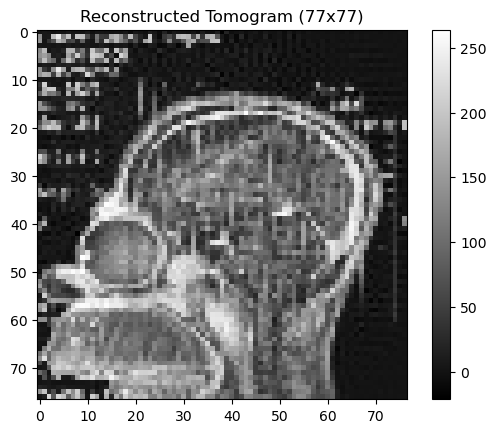

In [ ]:
# Reconstructed tomogram
plt.imshow(tomogram_77, cmap='gray')
plt.title('Reconstructed Tomogram (77x77)')
plt.colorbar()
plt.show()

In [ ]:
diagnosis = "Possible abnormality detected. Consult a medical professional for detailed diagnosis."
treatment = "Based on the image, further imaging and clinical evaluation are recommended."
print(diagnosis)
print(treatment)

Possible abnormality detected. Consult a medical professional for detailed diagnosis.
Based on the image, further imaging and clinical evaluation are recommended.


Task 3

Tomogram for 179 angles:


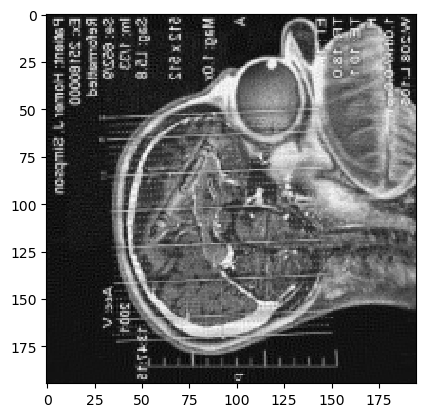

Tomogram for 170 angles:


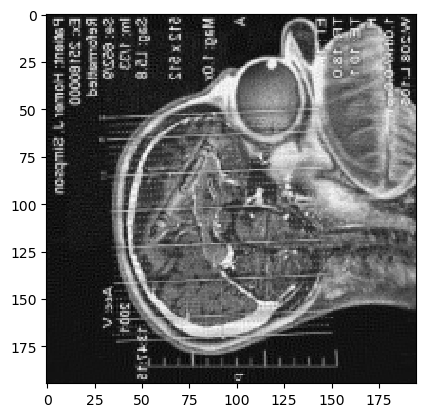

Tomogram for 161 angles:


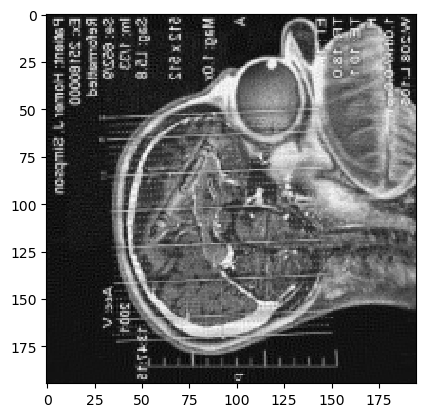

Tomogram for 152 angles:


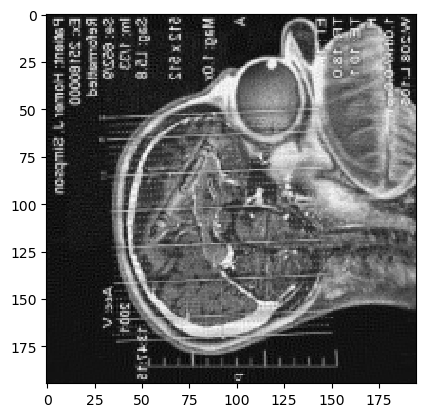

Tomogram for 143 angles:


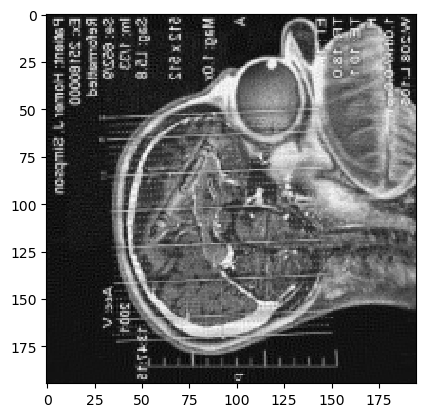

Tomogram for 134 angles:


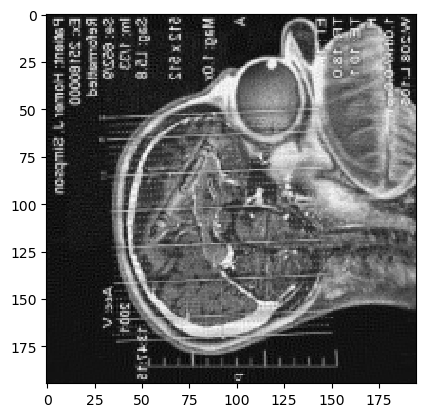

Tomogram for 125 angles:


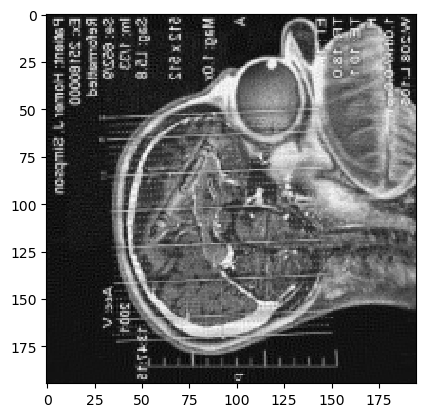

Tomogram for 116 angles:


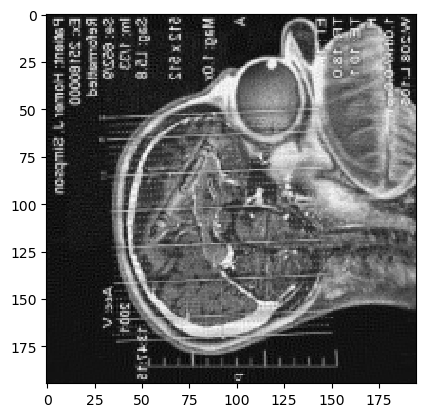

Tomogram for 107 angles:


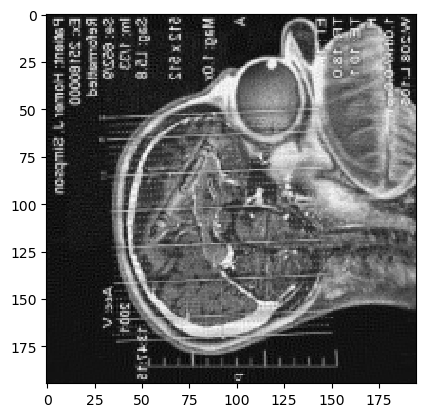

Tomogram for 98 angles:


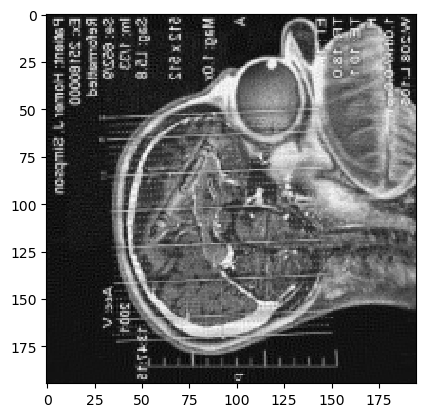

Tomogram for 89 angles:


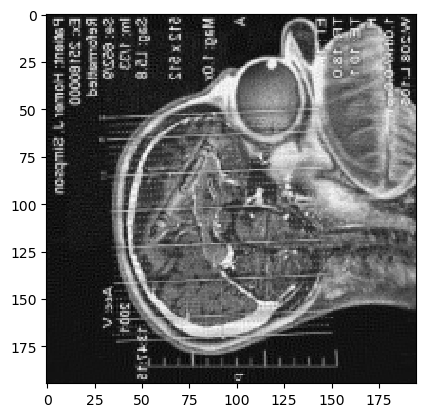

Tomogram for 80 angles:


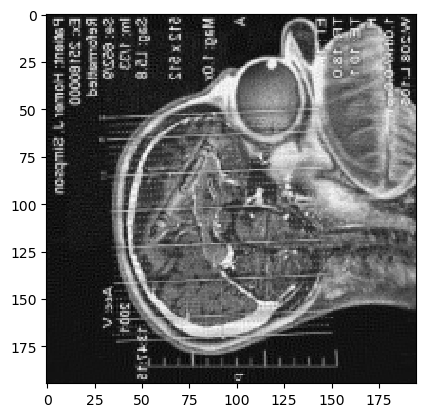

Tomogram for 71 angles:


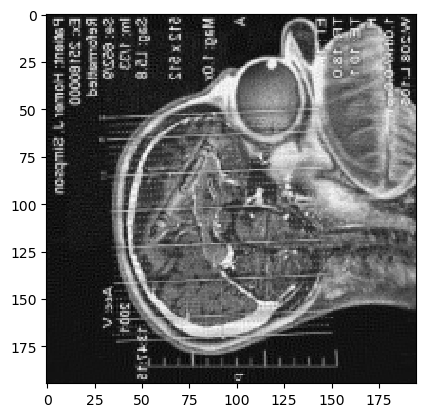

Tomogram for 62 angles:


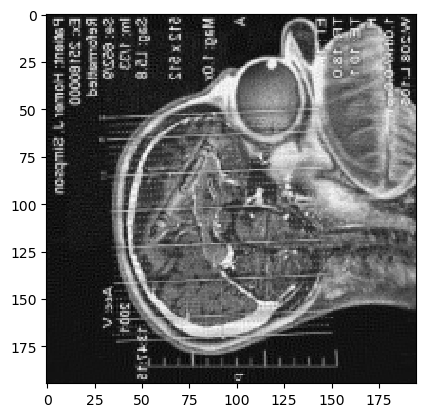

Tomogram for 53 angles:


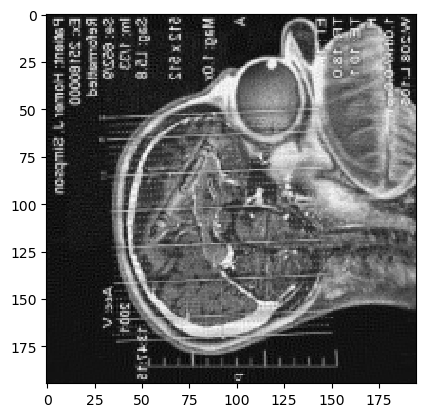

Tomogram for 44 angles:


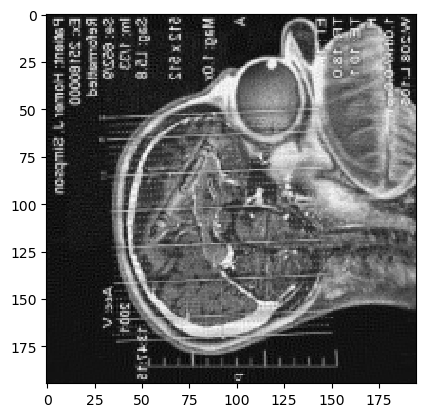

Tomogram for 35 angles:


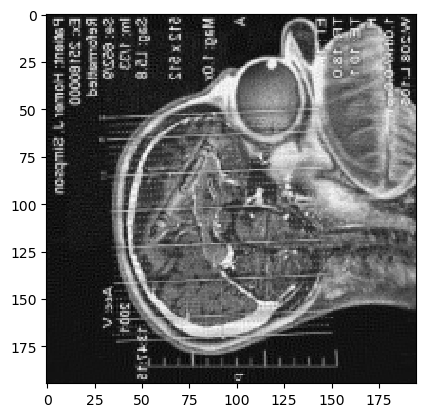

Tomogram for 26 angles:


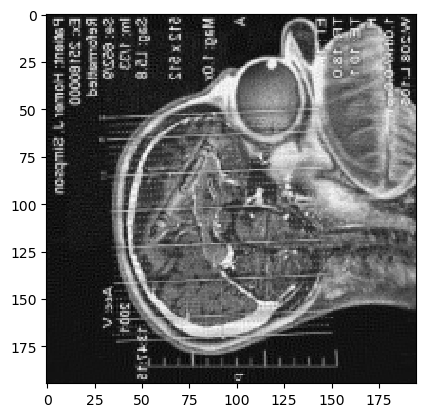

Tomogram for 17 angles:


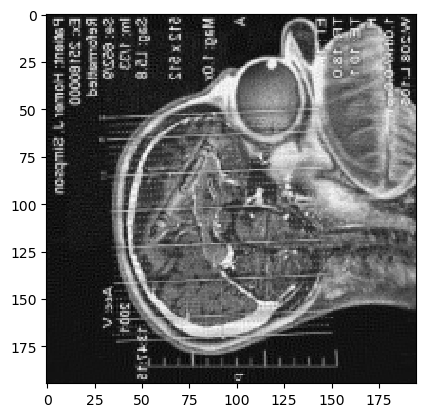

Tomogram for 8 angles:


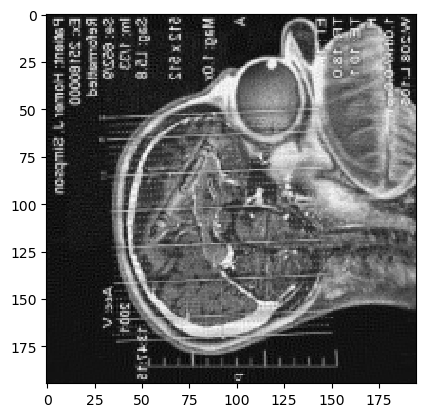

In [ ]:
# option small
M = 77
Np = 109
n_alphas = 90
# option big
M = 195
Np = 275
n_alphas = 179

for n_alphas_ in range(n_alphas, 1, -1 * math.ceil(n_alphas / 20)):
    indices = np.linspace(0, len(alphas) - 1, n_alphas_, dtype=int)
    alphas_ = alphas[indices]
    y_ = y[indices]
    x_ = coo_to_csc(construct_X(M, alphas_, Np))
    print(f"Tomogram for {n_alphas_} angles:")
    show_tomogram(X, y)